#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the CSV file (assume that the file is stored in the data folder)

In [2]:
housing = pd.read_csv('./data/train.csv')


### Understanding the Data Structure

Get the columns in the pandas data frame using the `.columns` function

In [3]:
# columns
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Get the shape of the data using the `.shape` function

In [4]:
# Get the shape of data
housing.shape

(1460, 81)

The "shape" of the dataset shows that it has 1460 rows/instances, with data from 80 attributes. 
Out of the 80 attributes, one is the target (SalePrice) that the model should predict. 
Hence, there are 79 attributes that may be used for feature selection/engineering.

Get the first five rows of the data set using the `.head()` function

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Get the description about the data using the `.info()` method

In [6]:
housing = housing.drop("Id", axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Get the list of numerical attributes by excluding the datatype of object using the `exclude=['object']`

In [7]:
# List of numerical attributes
housing.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Get the length after excluding the columns of object type using the `len` function

In [8]:
len(housing.select_dtypes(exclude=['object']).columns)

37

Get the data summary with upto 2 decimals and call `transpose()` for a better view of the results

In [9]:
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


Get the categorical attributes by including datatype of type object using `include = ['object']`

In [10]:
# get categorical attribute
housing.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are 43 categorical columns with the following characteristics:

Get the categorical attributes using `include=['object']`

In [11]:
housing.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### Exploring Numerical Columns

Let’s have a detailed look at our target variable, SalePrice.

In [12]:
# Statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew of target column
It appears to be good practice to minimise the skew of the dataset. The reason often given is that skewed data adversely affects the prediction accuracy of regression models. 
Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests. 

(Not a needed step for target var, while we can scale the other numerical features)

Get the distribution plot using the seaborn `.displot` function

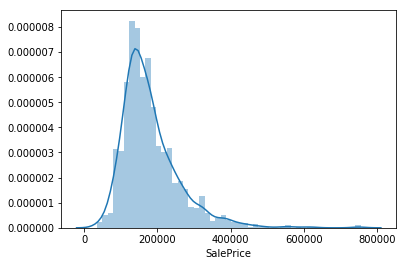

In [13]:
# Get the distribution plot
sns.distplot(housing['SalePrice']);

Applying a log transformation means to simply take the log of the skewed variable to improve the fit by altering the scale and making the variable more “normally” distributed.

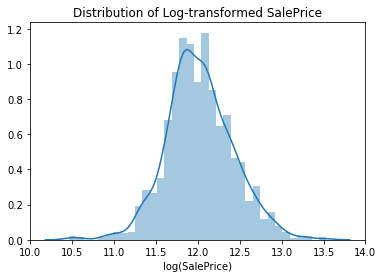

In [14]:
# Take the log to make the distribution more normal
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

We can clearly see that the log-transformed variable is more “normally” distributed — we have managed to reduce the skew.

We can plot the distributions of all the numerical variables by calling the distplot() method in a for loop, like so:

36


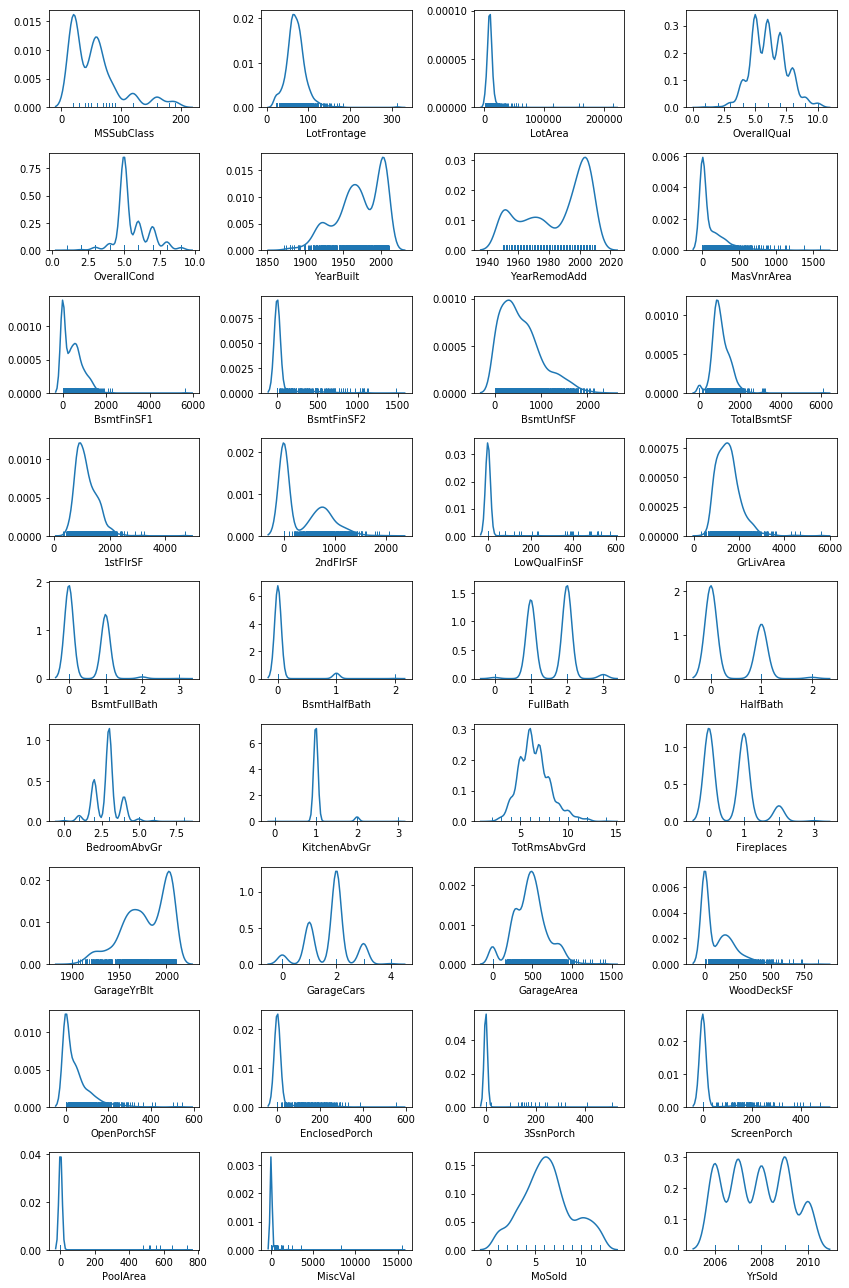

In [15]:
## What about the distribution of all the other numerical variables?

num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

print(len(num_attributes.columns))

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

We can clearly see how skewed LotArea is — it is in dire need of some polishing before it can be used for learning.

Since box plots give us a good overview of our data. From the distribution of observations w.r.t. the upper and lower quartiles, we can spot outliers. Let’s see this in action with the boxplot() method and a for loop to plot all the attributes in one go:

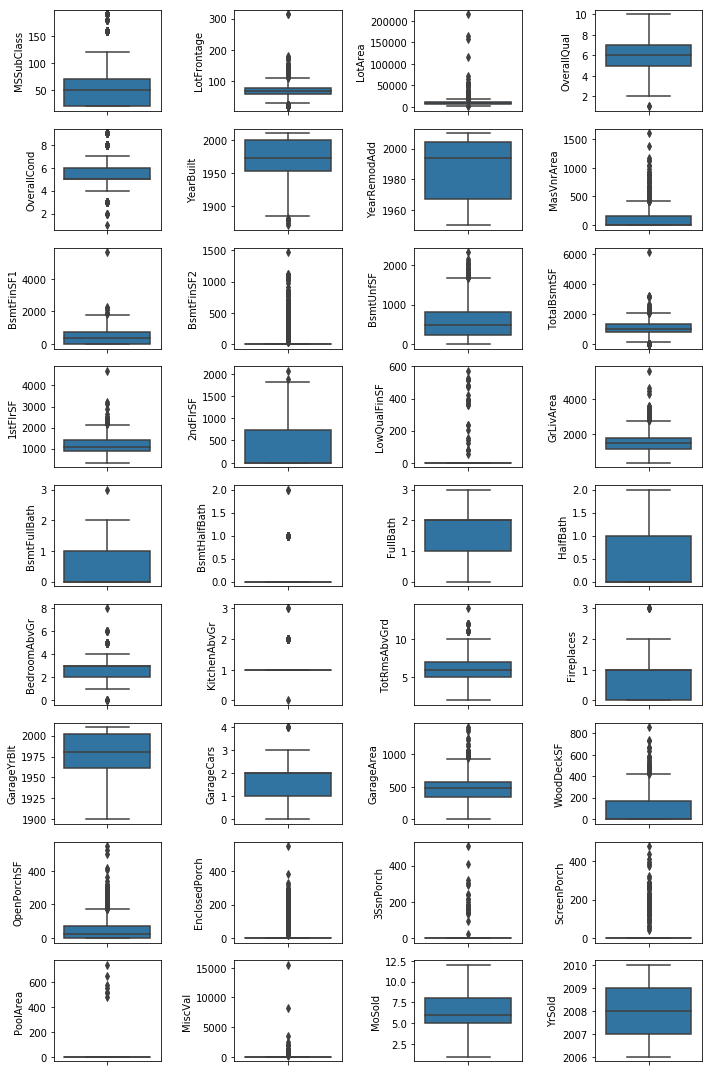

In [16]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

In [17]:
# return value at the given quantile over requested axis.
high_quant = housing.quantile(.999)
high_quant['LotArea']

162062.06000000096

We are going to look at the prices. The radius of each circle represents GrLivArea (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).

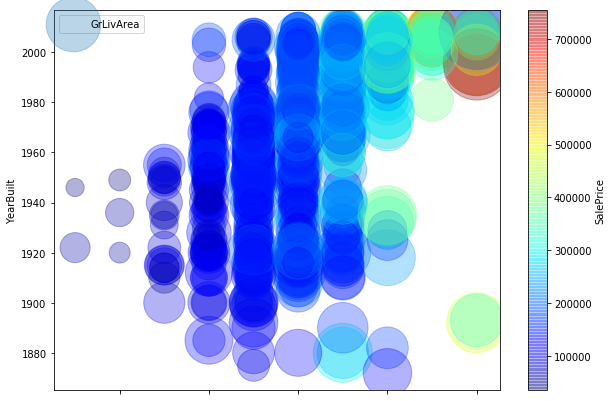

In [18]:
housing.plot(kind="scatter", x="OverallQual", y="YearBuilt",  s=housing["GrLivArea"], label="GrLivArea", alpha=0.3, 
             figsize=(10,7), c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

### Correlations Among Numerical Attributes

We can use the `corr()` method to very easily get the correlations and then visualize them using the `heatmap()` method – Python does feel like magic often, isn’t it?!

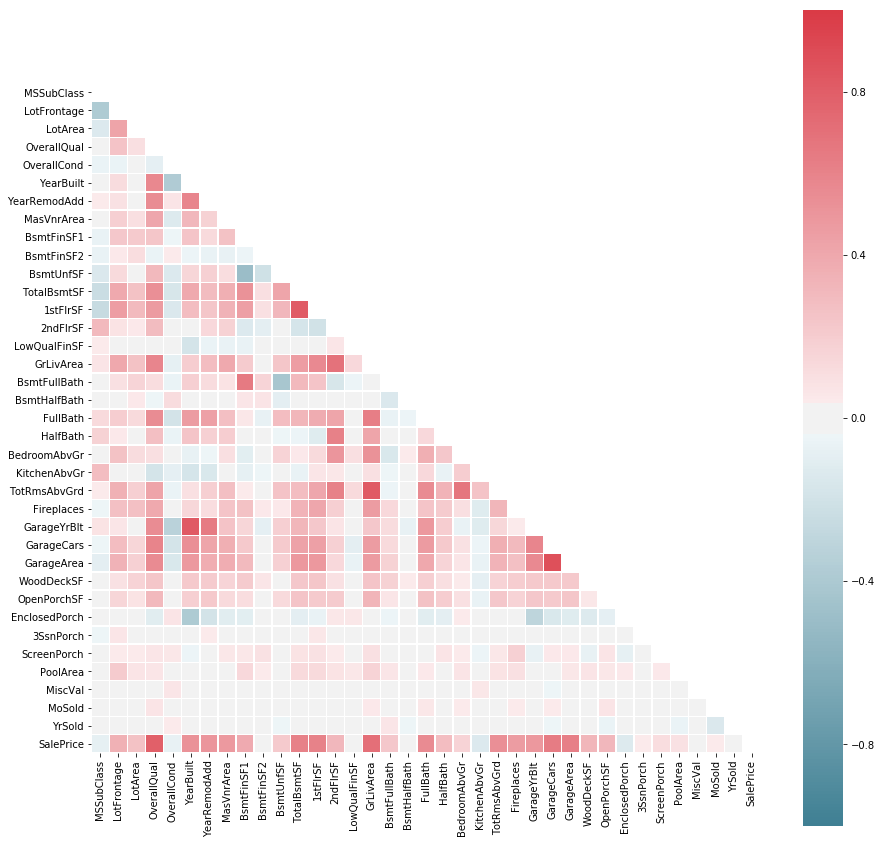

In [19]:
# Correlation of numerical attributes
corr = housing.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

With reference to the target SalePrice, the top correlated attributes are:

In [20]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

From these values, we can see that OverallQual and GrLivArea have the most impact on price, while attributes like PoolArea and MoSold are not related to it.

A rough joint distribution plot for each pair of variables can be done by using `pairplot()`from sns.

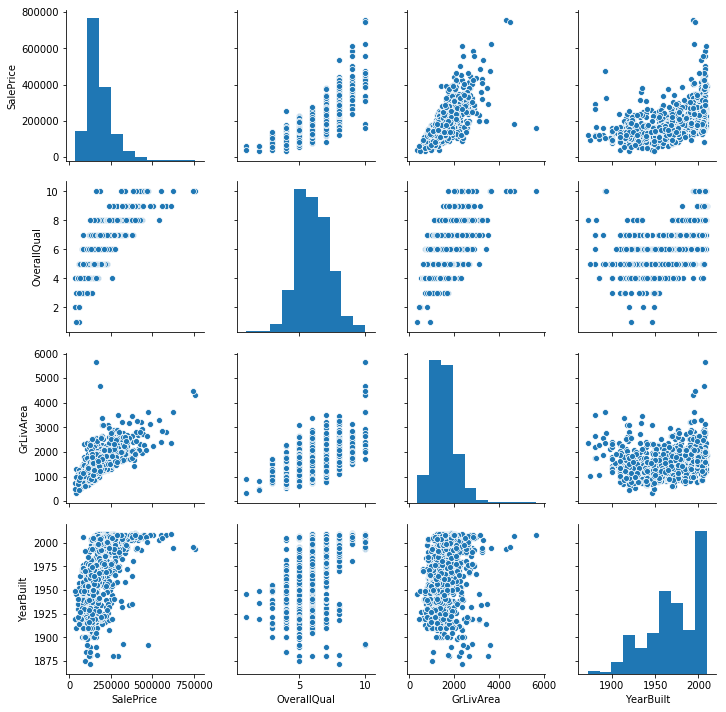

In [21]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])

From the pairplots, we can clearly see how with an increase in GrLivArea the price increases as well. Do play around with other attributes as well.

In [22]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [23]:
unique_important_corrs

,attribute pair,correlation
6,"(GarageArea, GarageCars)",0.882475
22,"(GarageYrBlt, YearBuilt)",0.825667
14,"(GrLivArea, TotRmsAbvGrd)",0.825489
18,"(1stFlrSF, TotalBsmtSF)",0.819530
31,"(OverallQual, SalePrice)",0.790982
5,"(GrLivArea, SalePrice)",0.708624
24,"(2ndFlrSF, GrLivArea)",0.687501
27,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
34,"(BsmtFinSF1, BsmtFullBath)",0.649212
32,"(GarageYrBlt, YearRemodAdd)",0.642277


Looking at the graphs for the highest corr var

Get the bar plot

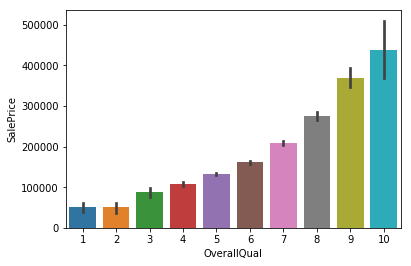

In [24]:
sns.barplot(housing.OverallQual, housing.SalePrice)

Get the box plot

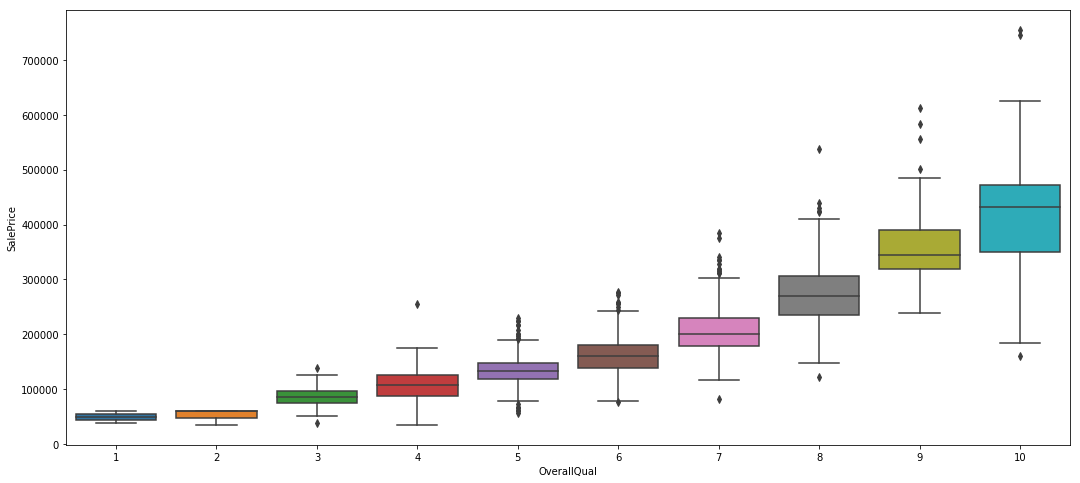

In [25]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=housing.OverallQual, y=housing.SalePrice)

Let’s look at the age of the house

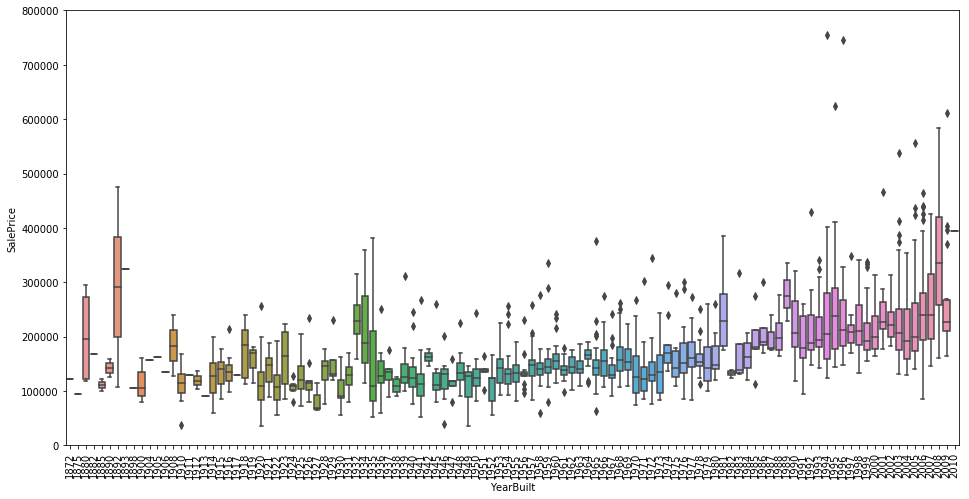

In [26]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Exploring Categorical Variables

Let’s just print again the names of the categorical columns first and then handpick some of the interesting ones for visual analysis.

In [27]:
cat_columns = housing.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Let's look at the impact of KitchQual on price:

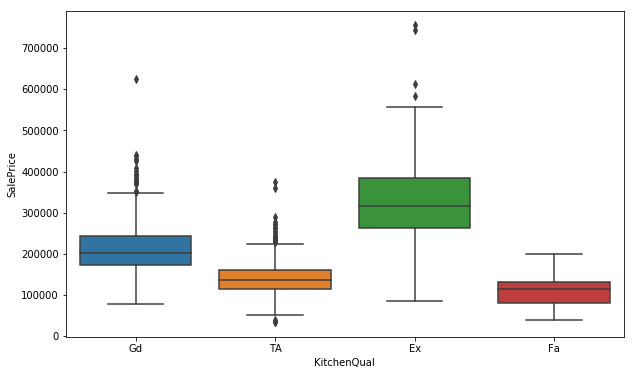

In [28]:
var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()

We can now see that Ex seems to be the more expensive option while Fa brings the prices down.

Let's look at the style of the house

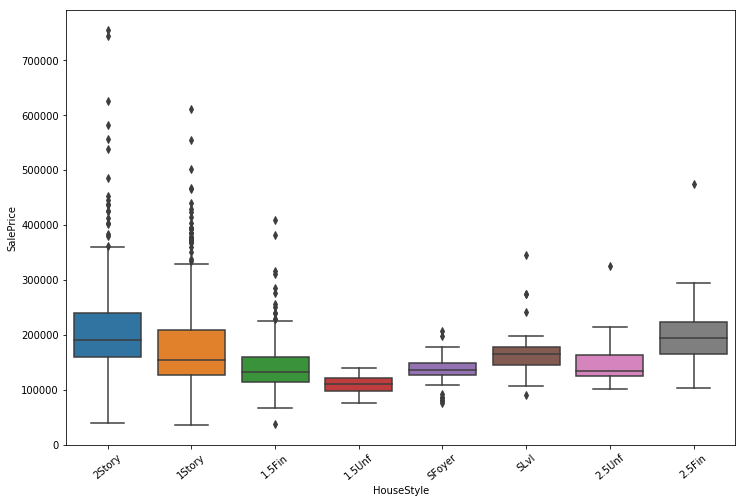

In [29]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.xticks(rotation=40)
plt.show()

We can see that 2Story houses have the highest variability in prices and they also tend to be more expensive, while 1.5Unf are the cheapest option.

Get the frequency for each of these types, we can use the countplot() method from sns like so:

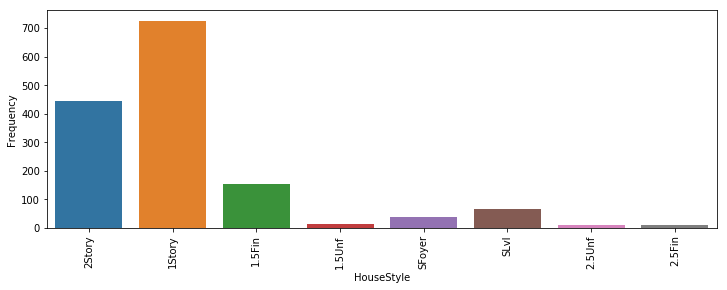

In [30]:
# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

Get exact count for each category, we can get that very easily from the DataFrame directly:

In [31]:
housing["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

We are also curious to see if the style of the houses has changed over the years, so let’s plot the two variables against each other.

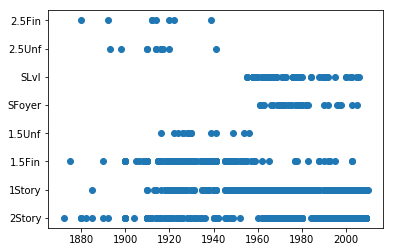

In [32]:
plt.scatter(housing['YearBuilt'],housing['HouseStyle'])